In [10]:
import numpy as np

class PolynomialRegression:

    def __init__(self, degree, alpha=1e-3, iters=1000):
        """Initialize polynomial degree, learning rate, and iteration count."""
        self.alpha = alpha
        self.iters = iters
        self.degree = degree
        self.w = None
        self.b = None

    def _polynomial_features(self, X):
        """Generate polynomial features up to the given degree."""
        return np.hstack([X ** i for i in range(1, self.degree + 1)])

    def _normalize(self, X):
        """Normalize features using mean and standard deviation (used in training)."""
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0) + 1e-8  # Add epsilon to avoid division by zero
        return (X - self.mean) / self.std

    def _normalize_with_stats(self, X):
        """Normalize using stored mean and std (used in prediction)."""
        return (X - self.mean) / self.std

    def gradients(self, X, y, y_pred):
        """Compute gradients of weights and bias."""
        err = y - y_pred
        dw = -(1 / self.m) * np.dot(X.T, err)
        db = -(1 / self.m) * np.sum(err)
        return dw, db

    def update_params(self, dw, db):
        """Update weights and bias using gradient descent."""
        self.w -= self.alpha * dw
        self.b -= self.alpha * db

    def predict(self, X):
        """Compute predictions using current weights and bias."""
        return np.dot(X, self.w) + self.b

    def fit(self, X, y):
        """Train the model using polynomial features and gradient descent."""
        X_poly = self._polynomial_features(X)
        X_poly_norm = self._normalize(X_poly)

        self.m, self.n = X_poly_norm.shape
        self.w = np.zeros(self.n)
        self.b = 0

        for _ in range(self.iters):
            y_pred = self.predict(X_poly_norm)
            dw, db = self.gradients(X_poly_norm, y, y_pred)
            self.update_params(dw, db)

    def final_predict(self, X):
        """Generate predictions on new data using trained model."""
        X_poly = self._polynomial_features(X)
        X_poly_norm = self._normalize_with_stats(X_poly)
        return self.predict(X_poly_norm)
    


In [11]:
import matplotlib.pyplot as plt

In [12]:
# Sample data

X = np.array([[1], [2], [3], [4], [5], [6], [7]])


y = np.array([1000, 1200, 1800, 3000, 5000, 8000, 12000])

In [34]:
# Model
pr = PolynomialRegression(degree=4, alpha=0.01, iters=1000)
pr.fit(X, y)

In [35]:
# Prediction

y_pred = pr.final_predict(X)

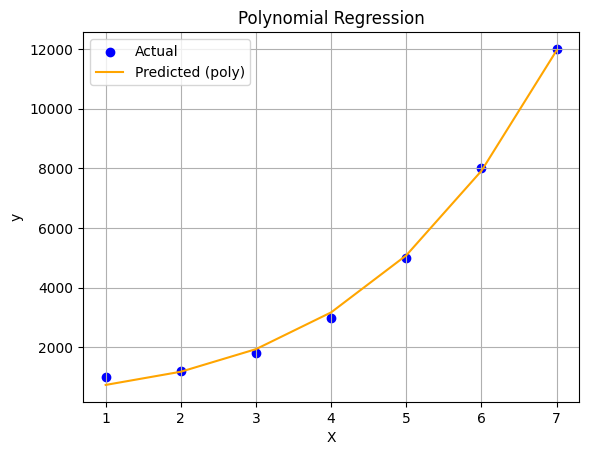

In [36]:
# Plot
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='orange', label='Predicted (poly)')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()